In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score




from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

Explore Data

In [21]:
df= pd.read_csv(r"data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [24]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df.duplicated().sum()

np.int64(0)

Analysis Data

In [27]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


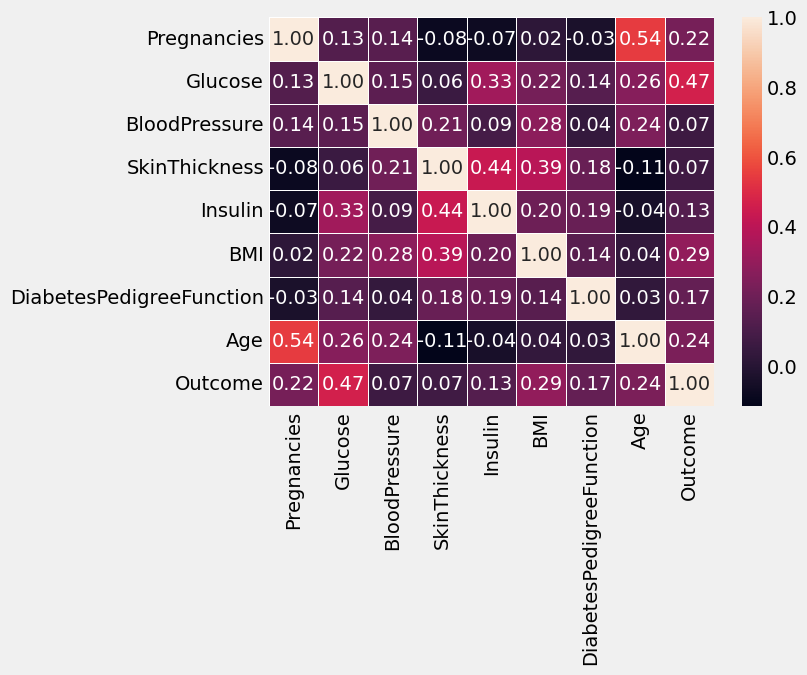

In [28]:
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidths=0.6)
plt.show()


<Axes: xlabel='Outcome', ylabel='count'>

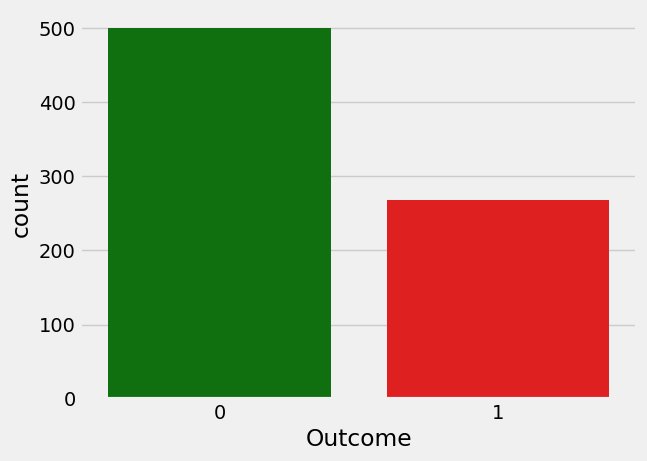

In [29]:
sns.countplot(x="Outcome",data=df,palette=['g','r'])

<Axes: ylabel='Age'>

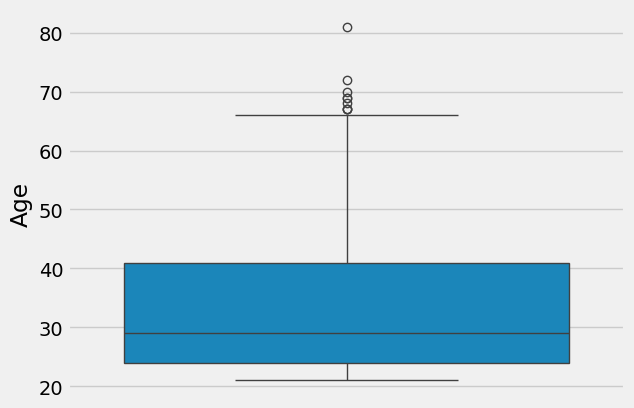

In [30]:
sns.boxplot(df.Age)

In [31]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']


In [32]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [33]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [34]:
#feature extraction
selector = SelectKBest(score_func=f_classif, k=5) 
X_selected = selector.fit_transform(x, y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [36]:
columns=['LogisticRegression','SVC','RandomForest','Navi Bias','DecisionTree','Boosting','Bagging','stacking_model']
result1=[]
result2=[]
result3=[]

In [37]:
def call(model):
    model.fit(x_train,y_train)
    Predict=model.predict(x_test)
    acc=accuracy_score(Predict,y_test)
    recall=recall_score(Predict,y_test)
    f1=f1_score(Predict,y_test)
    conf_mat=confusion_matrix(Predict,y_test)

    result1.append(acc)
    result2.append(recall)
    result3.append(f1)

    print(model)
    print("accuracy is :",acc*100,"%")
    print("recall is :",recall*100,"%")
    print('f1 score is:',f1*100,"%")
    print('confusion matrix is :')
    print(conf_mat)
    sns.heatmap(confusion_matrix(Predict,y_test),annot=True)

Models

In [38]:
Log_reg_model=LogisticRegression()
SVM_model=SVC()
RandomForest_model=RandomForestClassifier()
nav_baias_model=GaussianNB()
desc_tree_model=DecisionTreeClassifier()
Boosting_model=AdaBoostClassifier(estimator=desc_tree_model,n_estimators=100,random_state=42)
Bagging_model=BaggingClassifier(estimator=desc_tree_model,n_estimators=100,random_state=42)
stacking_model=StackingClassifier(estimators=[('lr',Log_reg_model), ('dt',desc_tree_model)], final_estimator=LogisticRegression())

LogisticRegression()
accuracy is : 75.32467532467533 %
recall is : 66.0377358490566 %
f1 score is: 64.81481481481481 %
confusion matrix is :
[[81 20]
 [18 35]]


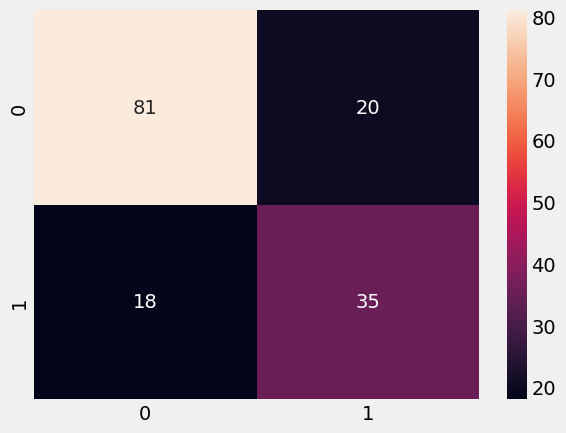

In [39]:
call(Log_reg_model)

SVC()
accuracy is : 76.62337662337663 %
recall is : 67.9245283018868 %
f1 score is: 66.66666666666666 %
confusion matrix is :
[[82 19]
 [17 36]]


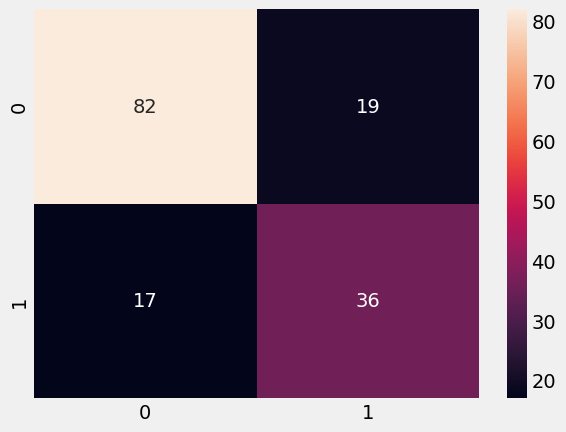

In [40]:
call(SVM_model)

RandomForestClassifier()
accuracy is : 77.92207792207793 %
recall is : 68.42105263157895 %
f1 score is: 69.64285714285714 %
confusion matrix is :
[[81 16]
 [18 39]]


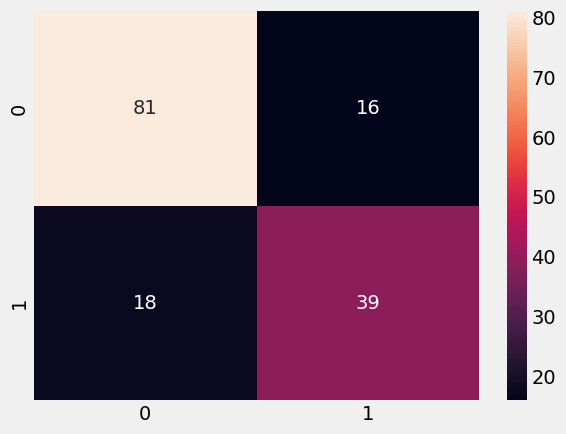

In [41]:
call(RandomForest_model)

GaussianNB()
accuracy is : 75.32467532467533 %
recall is : 64.91228070175438 %
f1 score is: 66.07142857142857 %
confusion matrix is :
[[79 18]
 [20 37]]


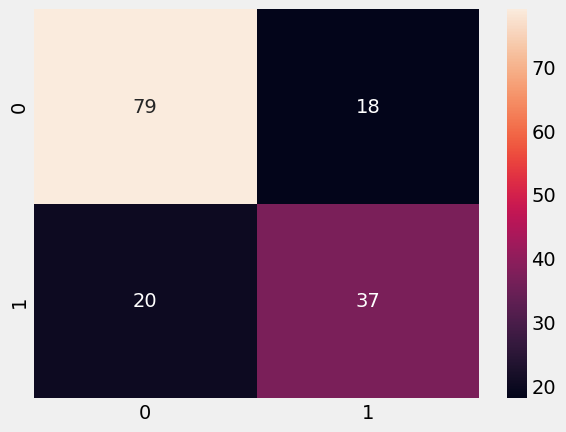

In [42]:
call(nav_baias_model)

DecisionTreeClassifier()
accuracy is : 72.07792207792207 %
recall is : 59.375 %
f1 score is: 63.86554621848739 %
confusion matrix is :
[[73 17]
 [26 38]]


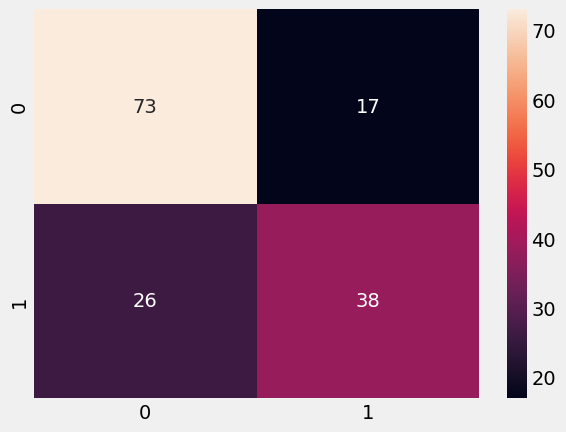

In [43]:
call(desc_tree_model)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)
accuracy is : 75.97402597402598 %
recall is : 65.0 %
f1 score is: 67.82608695652173 %
confusion matrix is :
[[78 16]
 [21 39]]


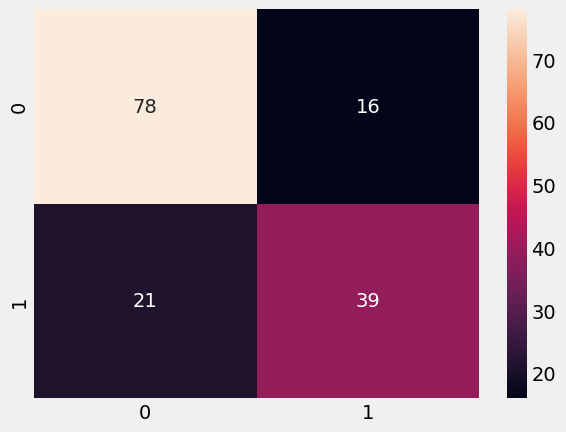

In [44]:
call(Bagging_model)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                   random_state=42)
accuracy is : 72.07792207792207 %
recall is : 59.67741935483871 %
f1 score is: 63.24786324786324 %
confusion matrix is :
[[74 18]
 [25 37]]


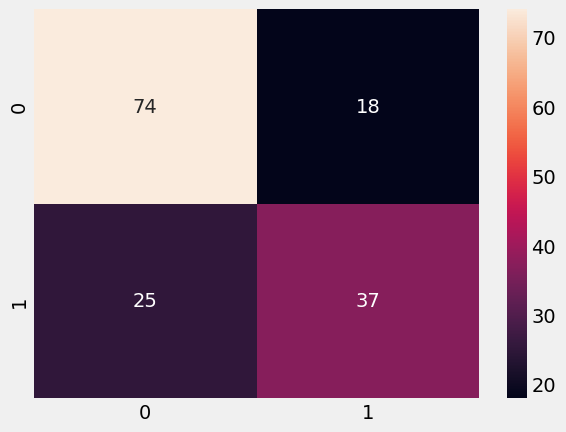

In [45]:
call(Boosting_model)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())
accuracy is : 77.92207792207793 %
recall is : 72.3404255319149 %
f1 score is: 66.66666666666666 %
confusion matrix is :
[[86 21]
 [13 34]]


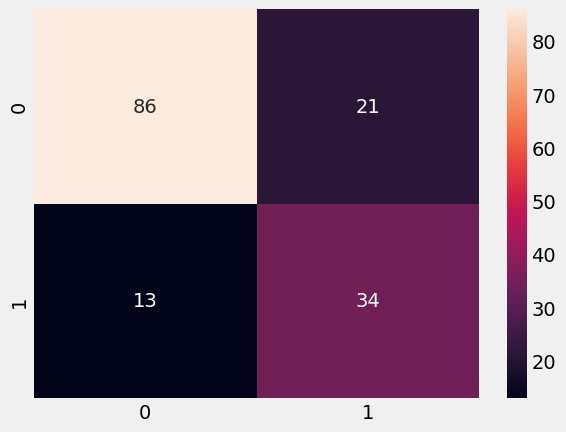

In [46]:
call(stacking_model)

In [47]:
result1     #accuracy for each model

[0.7532467532467533,
 0.7662337662337663,
 0.7792207792207793,
 0.7532467532467533,
 0.7207792207792207,
 0.7597402597402597,
 0.7207792207792207,
 0.7792207792207793]

In [48]:
result2    #recall for each model

[0.660377358490566,
 0.6792452830188679,
 0.6842105263157895,
 0.6491228070175439,
 0.59375,
 0.65,
 0.5967741935483871,
 0.723404255319149]

In [49]:
result3    #f1 score for each model

[0.6481481481481481,
 0.6666666666666666,
 0.6964285714285714,
 0.6607142857142857,
 0.6386554621848739,
 0.6782608695652174,
 0.6324786324786325,
 0.6666666666666666]

In [50]:
final_result=pd.DataFrame({'Algorithm':columns,'Accuracy':result1,'Recall Score':result2,'f1 Score':result3})
final_result

,Algorithm,Accuracy,Recall Score,f1 Score
0,LogisticRegression,0.753247,0.660377,0.648148
1,SVC,0.766234,0.679245,0.666667
2,RandomForest,0.779221,0.684211,0.696429
3,Navi Bias,0.753247,0.649123,0.660714
4,DecisionTree,0.720779,0.593750,0.638655
5,Boosting,0.759740,0.650000,0.678261
6,Bagging,0.720779,0.596774,0.632479
7,stacking_model,0.779221,0.723404,0.666667


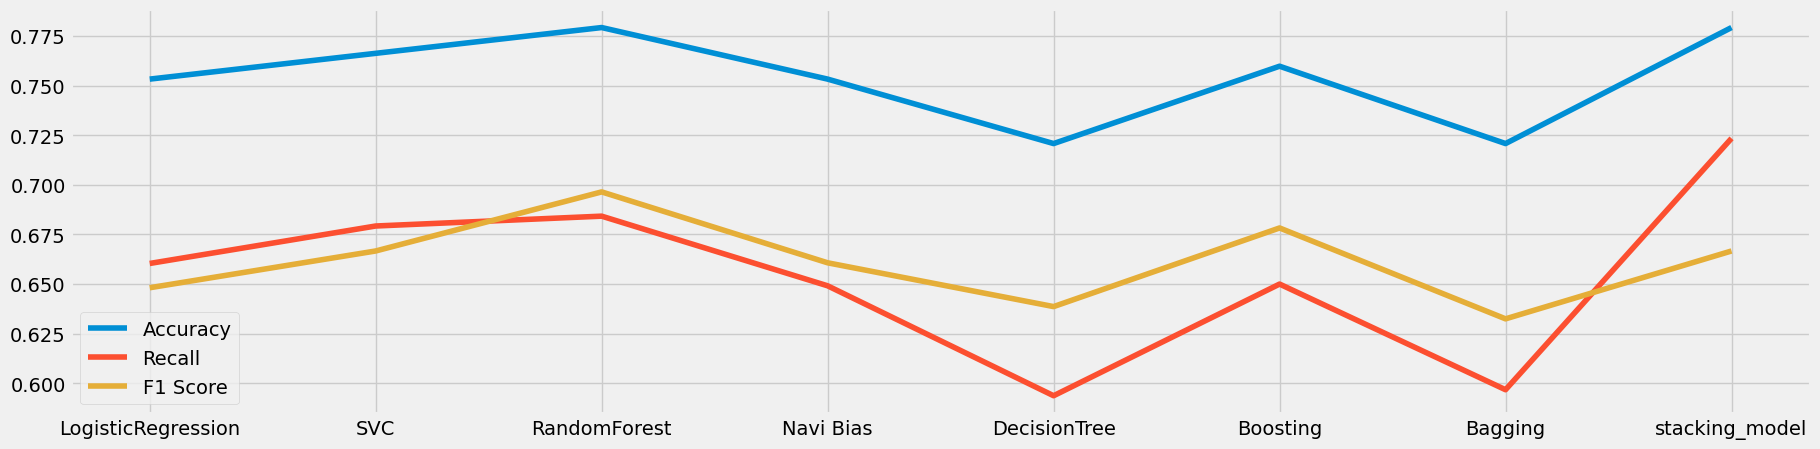

In [51]:

fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithm,result1,label='Accuracy')
plt.plot(final_result.Algorithm,result2,label='Recall')
plt.plot(final_result.Algorithm,result3,label='F1 Score')
plt.legend()
plt.show()

Cross Validation

In [52]:
Cross_Validation= cross_val_score(Log_reg_model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", Cross_Validation)
print("Mean Accuracy:", Cross_Validation.mean())
print("Standard Deviation of Accuracy:", Cross_Validation.std())

Cross-Validation Scores: [0.76623377 0.74675325 0.77922078 0.79084967 0.77777778]
Mean Accuracy: 0.7721670486376369
Standard Deviation of Accuracy: 0.014908662069834416


In [53]:
import pickle
filename='glucose_predict.sav'
pickle.dump(RandomForest_model,open(filename,'wb'))